In [1]:
import sys
sys.path.insert(1, '../src')
from utils import *

Useful resources:

https://readthedocs.org/projects/pandas-datareader/downloads/pdf/latest/

https://www.investopedia.com/terms/c/consumerpriceindex.asp

https://www.investopedia.com/insights/understanding-consumer-confidence-index/

https://fred.stlouisfed.org/series

In [2]:
SP_500 = pd.read_excel('../resources/SP_500.xlsx', index_col=0)
SP_500_symbol_list = SP_500.index.to_list()[:-2]

In [3]:
iTickers = {}
iTickers["SPY"] = "SPDR S&P 500 ETF Trust"
iTickers["VOO"] = "Vanguard S&P 500 ETF"
iTickers["VTI"] = "Vanguard Total Stock Market ETF"
iTickers["BRK-B"] = "Berkshire Hathaway Inc."
iTickers["AAPL"] = "Apple Inc."
iTickers["BAC"] = "Bank of America"
iTickers["MSFT"] = "Microsoft"
iTickers["IVV"] = "iShares Core S&P 500 ETF"
iTickers["NFLX"] = "Netflix"

SPDR S&P 500 ETF Trust
SPDR S&P 500 ETF Trust 2.5004
Vanguard S&P 500 ETF
Vanguard S&P 500 ETF 2.5269
Vanguard Total Stock Market ETF
Vanguard Total Stock Market ETF 2.4393
Berkshire Hathaway Inc.
Berkshire Hathaway Inc. 0.7833
Apple Inc.
Apple Inc. 3.42
Bank of America
Bank of America 1.9287
Microsoft
Microsoft 2.9596
iShares Core S&P 500 ETF
iShares Core S&P 500 ETF 2.5012
Netflix
Netflix 0.6069


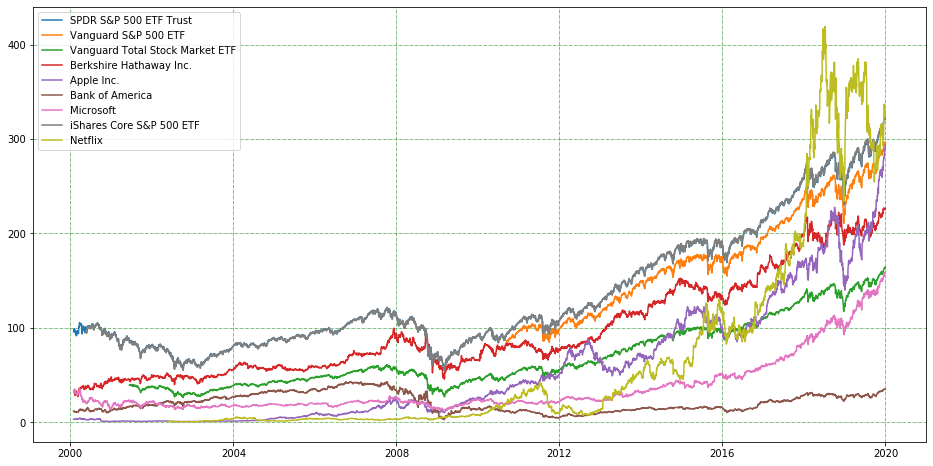

In [4]:
plt.figure(figsize=(16,8))
start_date='2000-01-31' 
for symb in iTickers:
    print(iTickers[symb])
    daa = get_historical_data(symb, start_date=start_date)
    sharpe_ratio = compute_sharpe(symb)
    #print(SP_500.loc[symb]['Name'], sharpe_ratio)
    print(iTickers[symb], sharpe_ratio)
    plt.plot(daa['Adj Close'])
    plt.grid(color='g', linestyle='-.', linewidth=0.5)
plt.legend([iTickers[sym] for sym in iTickers])
plt.savefig('../results/well-known-tickers.png')

In [5]:
for symb in SP_500_symbol_list[:5]:  
    print("---------------\n", symb)
    sharpe_ratio = compute_sharpe(symb)
    print(SP_500.loc[symb]['Name'], sharpe_ratio)

---------------
 A
Agilent Technologies, Inc. 1.2822
---------------
 AAL
American Airlines Group, Inc. -0.3002
---------------
 AAP
Advance Auto Parts, Inc. 0.0596
---------------
 AAPL
Apple, Inc. 3.42
---------------
 ABBV
AbbVie, Inc. 0.1799


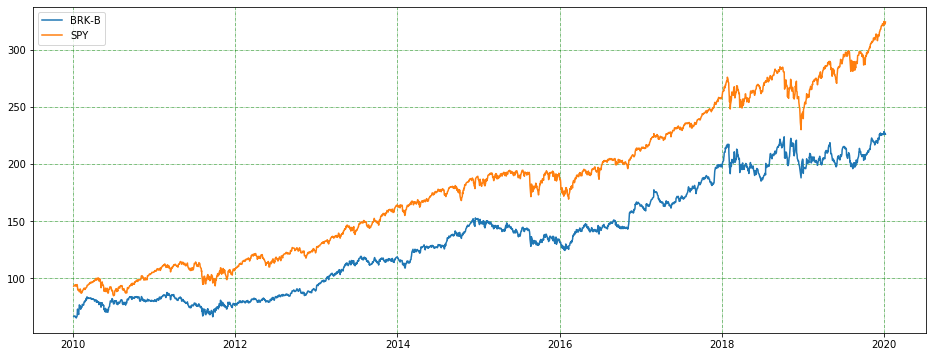

In [6]:
plt.figure(figsize=(16,6))
start_date='2010-01-02' 
end_date='2020-01-07' 
for symb in ['BRK-B','SPY']:
    daa = get_historical_data(symb, start_date=start_date, end_date=end_date)
    plt.plot(daa['Adj Close'])
    plt.grid(color='g', linestyle='-.', linewidth=0.5)
plt.legend(['BRK-B','SPY'])
plt.savefig('../results/BRK_vs_SPY.png')

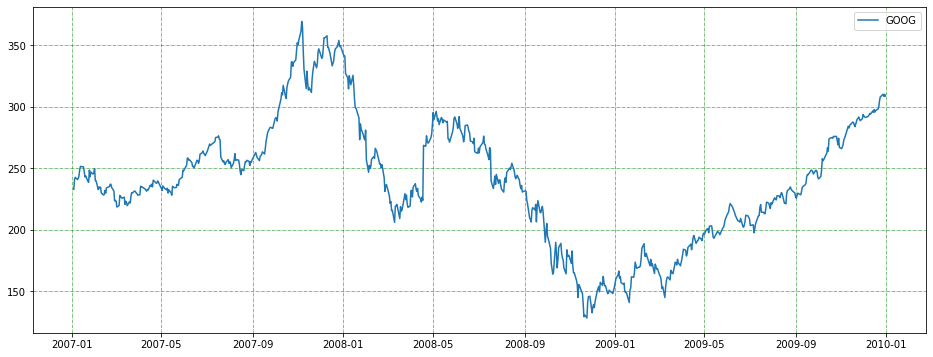

In [7]:
plot_stock_price('GOOG', start_date='2007-01-02', end_date='2010-01-02')

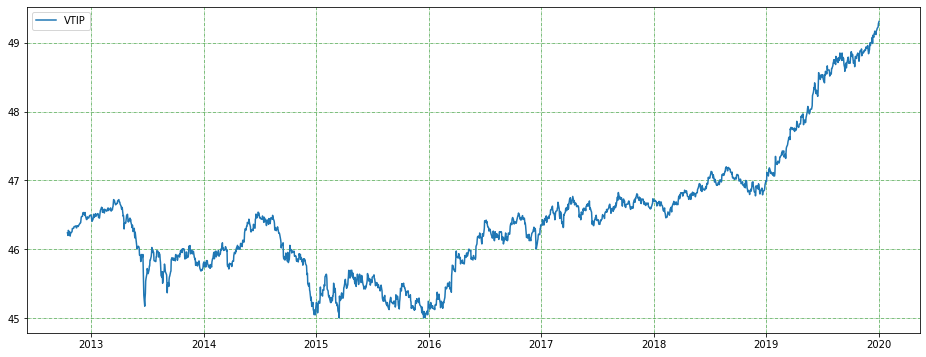

In [8]:
plot_stock_price('VTIP', start_date='1990-01-01', end_date='2020-01-01')

Vanguard 500 Index Fund Admiral Shares

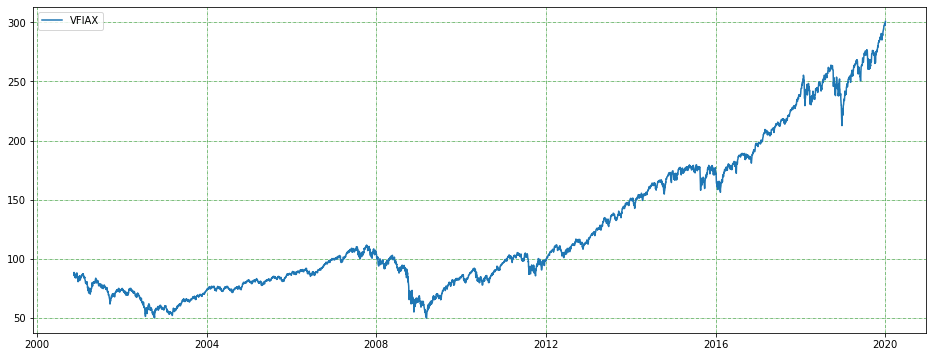

In [9]:
plot_stock_price('VFIAX', start_date='1990-01-01', end_date='2020-01-01')

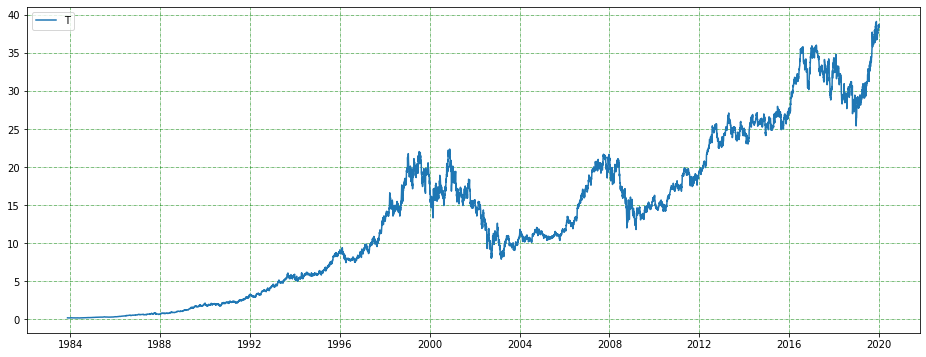

In [10]:
plot_stock_price('T', start_date='1980-01-01', end_date='2020-01-01')

iShares 20+ Year Treasury Bond ETF (TLT)

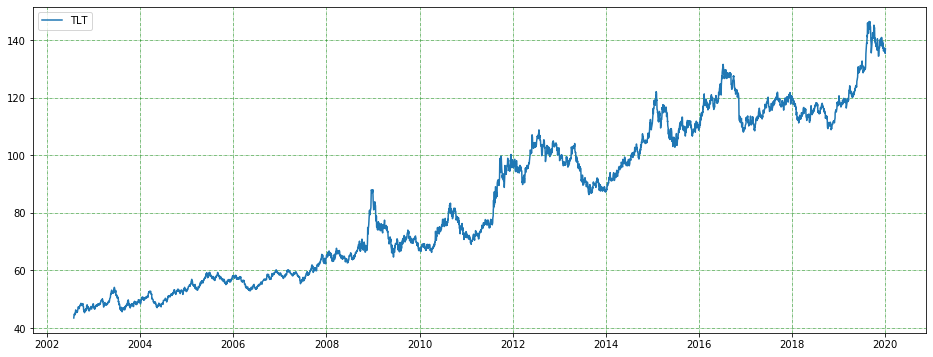

In [11]:
plot_stock_price('TLT', start_date='1900-01-01', end_date='2020-01-01')

13 Week treasury bill

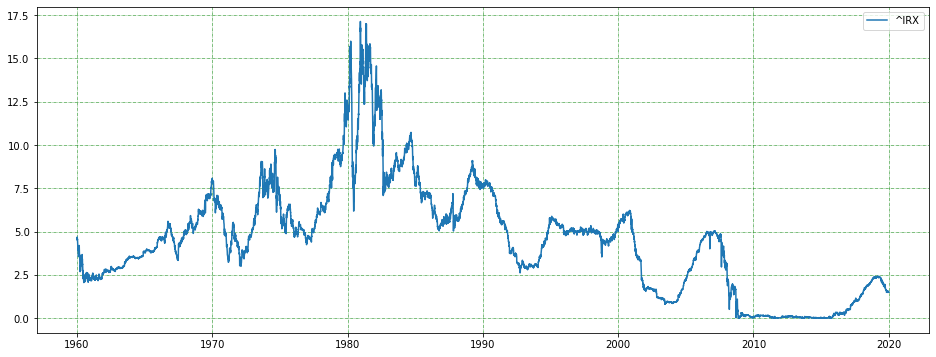

In [12]:
plot_stock_price('^IRX', start_date='1900-01-01', end_date='2020-01-01')

30 Year Treasury bill

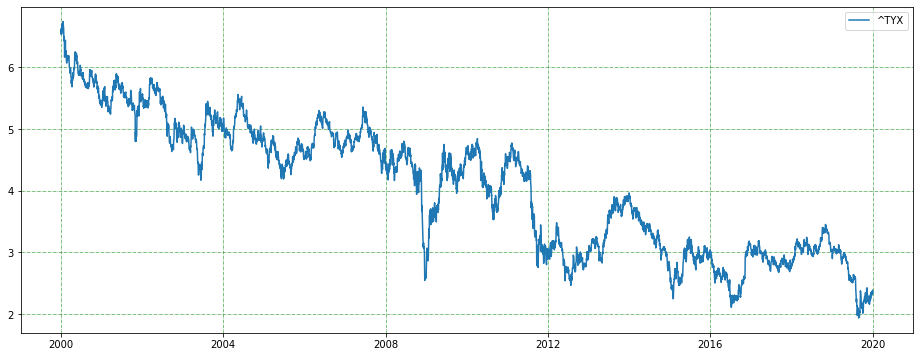

In [13]:
plot_stock_price('^TYX', start_date='2000-01-01', end_date='2020-01-01')

Vanguard Target Retirement 2045 Fund Investor Shares

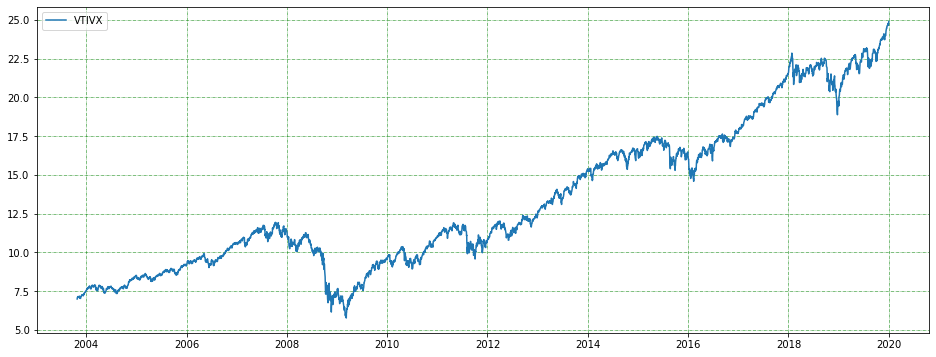

In [14]:
plot_stock_price('VTIVX', start_date='2000-01-01', end_date='2020-01-01')

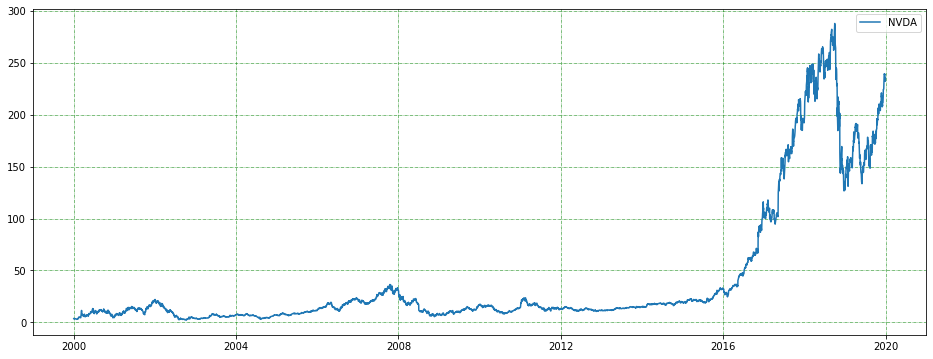

In [18]:
plot_stock_price('NVDA', start_date='2000-01-02', end_date='2019-12-31')

In [15]:
SP500_rate_of_return_all = compute_avg_annual_return_between_2_periods(SP_500_symbol_list[:5])
SP500_rate_of_return = {x:round(SP500_rate_of_return_all.loc[x],2) for x in SP500_rate_of_return_all.index \
                        if not pd.isnull(SP500_rate_of_return_all.loc[x])}

In [16]:
SP500_rate_of_return_clean = {k: v for k, v in sorted(SP500_rate_of_return.items(), key=lambda item: item[1])}
SP500_rate_of_return_clean

{'A': 0.03, 'AAPL': 0.26}

In [17]:
compute_avg_annual_return_between_2_periods('BRK-B')

0.10278063728967202